In [11]:
from sklearn.decomposition import PCA

def extract_pca_features(images, n_components=None):
    # Reshape the images into a 2D array
    flattened_images = images.reshape(len(images), -1)
    pca = PCA(n_components=n_components)
    # Apply PCA directly to the 2D array
    pca_features = pca.fit_transform(flattened_images)
    return pca_features

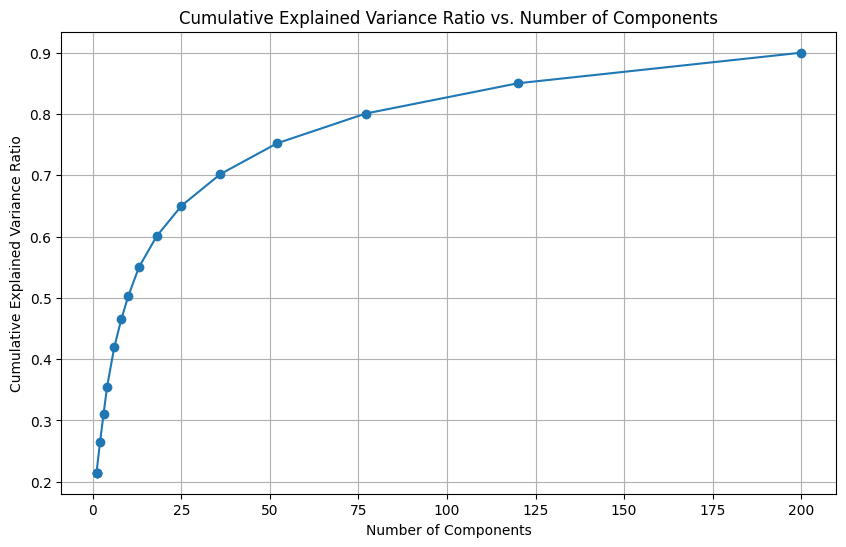

In [12]:
import matplotlib.pyplot as plt

def plot_cumulative_variance_ratio(images, threshold_range=(0.1, 0.95), step=0.05):
    flattened_images = images.reshape(len(images), -1)
    pca = PCA()
    pca.fit(flattened_images)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    thresholds = np.arange(*threshold_range, step=step)
    n_components_list = []
    cumulative_variance_list = []

    for threshold in thresholds:
        n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
        n_components = min(n_components, min(flattened_images.shape))
        n_components_list.append(n_components)
        cumulative_variance_list.append(cumulative_variance_ratio[n_components - 1])

    plt.figure(figsize=(10, 6))
    plt.plot(n_components_list, cumulative_variance_list, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
    plt.grid(True)
    plt.show()

try:
    plot_cumulative_variance_ratio(X_train_filtered)
except ValueError as e:
    print(f"Error: {e}")


In [13]:
from sklearn.decomposition import PCA

def find_optimal_n_components(images, threshold=0.85):
    flattened_images = images.reshape(len(images), -1)
    pca = PCA()
    pca.fit(flattened_images)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
    n_components = min(n_components, min(flattened_images.shape))
    n_components = min(n_components, min(flattened_images.shape))
    return n_components

optimal_n_components = find_optimal_n_components(X_train_filtered)
print("Optimal number of components:", optimal_n_components)

Optimal number of components: 120


In [14]:
pca_train_features = extract_pca_features(X_train_filtered, n_components=120)
pca_test_features = extract_pca_features(X_test_filtered, n_components=120)

In [15]:
np.save('pca_train_features.npy', pca_train_features)
np.save('pca_test_features.npy', pca_test_features)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

svm_classifier = SVC()
svm_classifier.fit(pca_train_features, y_train_filtered)
svm_pred = svm_classifier.predict(pca_test_features)
svm_accuracy = accuracy_score(y_test_filtered, svm_pred)
print("LBP feature extracted Accuracy:",svm_accuracy)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(pca_train_features, y_train_filtered)
rf_pred = rf_classifier.predict(pca_test_features)
rf_accuracy = accuracy_score(y_test_filtered, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(pca_train_features, y_train_filtered)
knn_pred = knn_classifier.predict(pca_test_features)
knn_accuracy = accuracy_score(y_test_filtered, knn_pred)
print("KNN Classifier Accuracy:", knn_accuracy)

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(pca_train_features, y_train_filtered)
gb_pred = gb_classifier.predict(pca_test_features)
gb_accuracy = accuracy_score(y_test_filtered, gb_pred)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

LBP feature extracted Accuracy: 0.6887417218543046
Random Forest Classifier Accuracy: 0.7417218543046358
KNN Classifier Accuracy: 0.5364238410596026
Gradient Boosting Classifier Accuracy: 0.5562913907284768
